In [1]:
import argparse
import os
import pandas as pd
import h5py
import numpy as np
import sys
import json
from os import environ as cuda_environment
import multiprocessing
import BM_CR_funcs as BMf

In [4]:
inputfolder = '/Users/ellenvanmaren/Desktop/Insel/EL_experiment/Codes/Cluster_scripts/Data/BM_CR'
output_folder = os.path.join(inputfolder, "NMF_output")
files_to_process = [
        filename
        for filename in os.listdir(inputfolder)
        if filename.endswith(".csv") and filename.startswith("EL")
    ]

In [243]:
#1. Load data
filename = files_to_process[12]
print(filename)
con_trial = pd.read_csv(os.path.join(output_folder, filename.replace(".csv", "_cluster.csv")))

filename_h5 = filename.replace(".csv", "_nmf.h5")
with h5py.File(os.path.join(output_folder,filename_h5), 'r') as hf:
        # Read W and H datasets
        W = hf['W'][:]
        H = hf['H'][:]
        
filename_json = filename.replace(".csv", "_nmf_cluster.json")
with open(os.path.join(output_folder, filename_json), 'r') as json_file:
    clusters = json.load(json_file)
    
con_trial['SleepState'] ='NREM1'
con_trial.loc[(con_trial.Sleep==2), 'SleepState'] ='NREM'
con_trial.loc[(con_trial.Sleep==3), 'SleepState'] ='NREM'
con_trial.loc[(con_trial.Sleep==0), 'SleepState'] ='Wake'
con_trial.loc[(con_trial.Sleep==4), 'SleepState'] ='REM'
    
con_trial = con_trial[(con_trial.SleepState!= 'NREM1')]
con_trial = con_trial.reset_index(drop=True)
con_trial.insert(5,'Cluster', 0)

EL014_con_trial.csv


In [244]:
# Add 'Cluster' column to the DataFrame based on the cluster assignments
for i, channels_in_cluster in clusters.items():
    con_trial.loc[np.isin(con_trial.Con_ID, channels_in_cluster), 'Cluster'] = np.array(i).astype('int')+1


# Add 'Cluster' column to the DataFrame based on the cluster assignments
for i, channels_in_cluster in clusters.items():
    data_plot = con_trial.loc[np.isin(con_trial.Con_ID, channels_in_cluster)]
    plt.figure()
    sns.stripplot(x='SleepState', y='LL_norm', data=data_plot)
    plt.show()


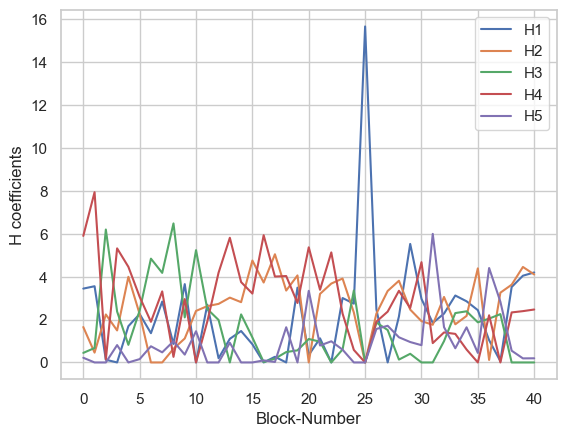

In [245]:
for i in range(H.shape[0]):
    plt.plot(H[i], label='H'+str(i+1))
    
plt.ylabel('H coefficients')
plt.xlabel('Block-Number')
plt.legend()

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [246]:
con_mean = con_trial.groupby(['Con_ID','Stim', 'Chan', 'SleepState'], as_index=False)[['Sig','d','LL_norm']].mean()

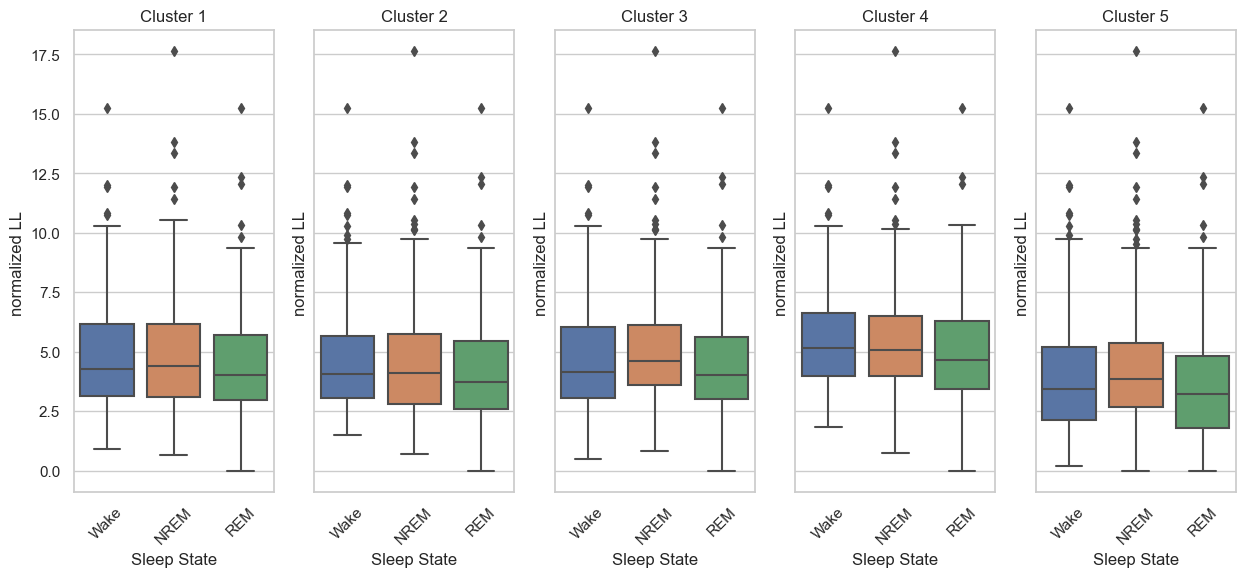

In [247]:
num_clusters = len(clusters.items())
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 6), sharey=True)

# Loop through each unique cluster to create boxplot
for i, channels_in_cluster in clusters.items():
    i = np.array(i).astype('int')
    data_plot = con_mean.loc[np.isin(con_mean.Con_ID, channels_in_cluster)]
    
    ax = sns.boxplot(x='SleepState', y='LL_norm',data=data_plot, ax=axes[i], order=['Wake', 'NREM', 'REM'])
    ax.set_title(f'Cluster {i+1}')
    ax.set_xlabel('Sleep State')
    ax.set_ylabel('normalized LL ')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #ax.set_ylim([0, 5])

[0 1 2 3 4 5]


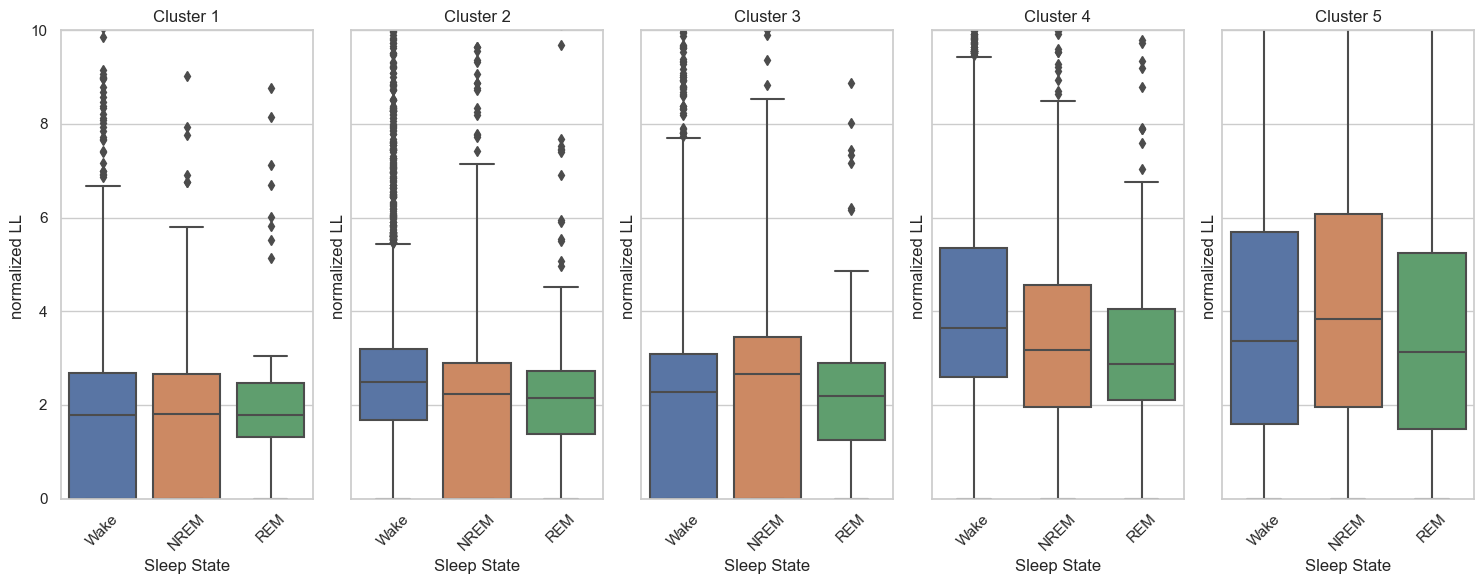

In [248]:
# Set up the plotting style
sns.set(style="whitegrid")

# Get unique cluster indices
unique_clusters = np.sort(con_trial['Cluster'].unique())
print(unique_clusters)
# Create a figure and subplots
num_clusters = len(clusters.items())
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 6), sharey=True)

# Loop through each unique cluster to create boxplot
for i, cluster_idx in enumerate(np.arange(1,num_clusters+1)):
    cluster_data = con_trial[con_trial['Cluster'] == cluster_idx]
    
    ax = sns.boxplot(x='SleepState', y='LL_norm', data=cluster_data, ax=axes[i])
    ax.set_title(f'Cluster {cluster_idx}')
    ax.set_xlabel('Sleep State')
    ax.set_ylabel('normalized LL ')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylim([0, 10])
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()